# `Decision Trees`

Decision trees are widely used models for classification and regression tasks. Essentially,
they learn a hierarchy of if/else questions, leading to a decision.

Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else
questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is “yes,”
you can ask another question that could help you distinguish between hawks and penguins. 

For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you
will need to ask a question to distinguish between these two animals—for example, asking whether the animal has fins.

This series of questions can be expressed as a decision tree, as shown in the following figure.

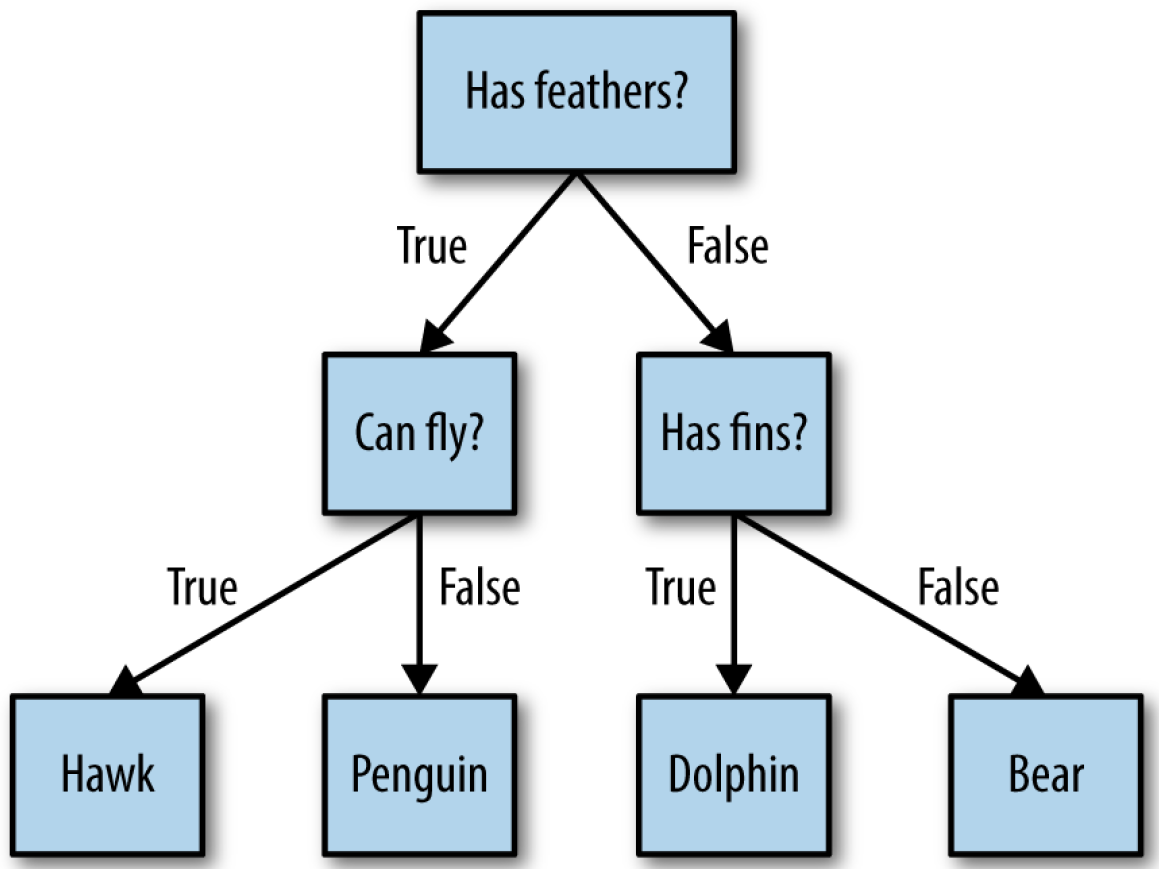

In [45]:
from IPython.display import Image
Image(filename='Fig1.png',width = "600",height = "300")

In this illustration, each node in the tree either represents a question or a terminal
node (also called a leaf) that contains the answer. The edges connect the answers to a
question with the next question you would ask.

# => Controlling Complexity of decision trees

Typically, building a tree as described here and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class.

There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collapsing
nodes that contain little information (also called post-pruning or just pruning).
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and
DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not
post-pruning.

Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As
always, we import the dataset and split it into a training and a test part. Then we build
a model using the default setting of fully developing the tree (growing the tree until
all leaves are pure). We fix the random_state in the tree, which is used for tiebreaking
internally:

## 1) Loading data and splitting it

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [49]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [50]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 2) Training the model(s)

### **Q1)** `Decision Tree Training`
####  Training a decision tree classifier with default parameters (random_state=0), and report the accuracy on the training and test data, respectively.

In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy of training data through Decision Tree:",clf.score(X_train,y_train,sample_weight=None))
print("Accuracy of testing data through Decision Tree:",clf.score(X_test,y_test,sample_weight=None))

Accuracy of training data through Decision Tree: 1.0
Accuracy of testing data through Decision Tree: 0.9370629370629371


In [52]:
from sklearn.metrics import  accuracy_score
print("test accuracy of test data through Decision Tree: ", accuracy_score(y_test, y_pred))

test accuracy of test data through Logistic regression:  0.9370629370629371


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

   micro avg       0.94      0.94      0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

[[49  4]
 [ 5 85]]


### **Q2)** `Logistic Regression Training`
#### Training a LogisticRegression classifier with default parameters, and report the accuracy on the training and test data, respectively.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
print("test accuracy of test data through Logistic regression: ", accuracy_score(y_test, y_pred))

test accuracy of test data through Logistic regression:  0.958041958041958


In [69]:
print("Accuracy of training data through Logistic Regression:",model.score(X_train,y_train,sample_weight=None))
print("Accuracy of testing data through Logistic Regression:",model.score(X_test,y_test,sample_weight=None))

Accuracy of training data through Logistic Regression: 0.9530516431924883
Accuracy of testing data through Logistic Regression: 0.958041958041958


In [70]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

[[48  5]
 [ 1 89]]


### Explain your findings

Compare the results from **Q1** and **Q2**, and provide your explanation.
Logistic Regression is more accurate than Decision Tree

## 3) Pre-pruning

Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set *max_depth=4*, limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set.

### Training a decision tree classifier with default parameters (random_state=0 and max_depth=4), and report the accuracy on the training and test data, respectively.

In [71]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=4)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy of training data (with max_depth 4):",clf.score(X_train,y_train,sample_weight=None))
print("Accuracy of testing data (with max_depth 4):",clf.score(X_test,y_test,sample_weight=None))

Accuracy of training data (with max_depth 4): 0.9882629107981221
Accuracy of testing data (with max_depth 4): 0.951048951048951


# Analysing decision trees

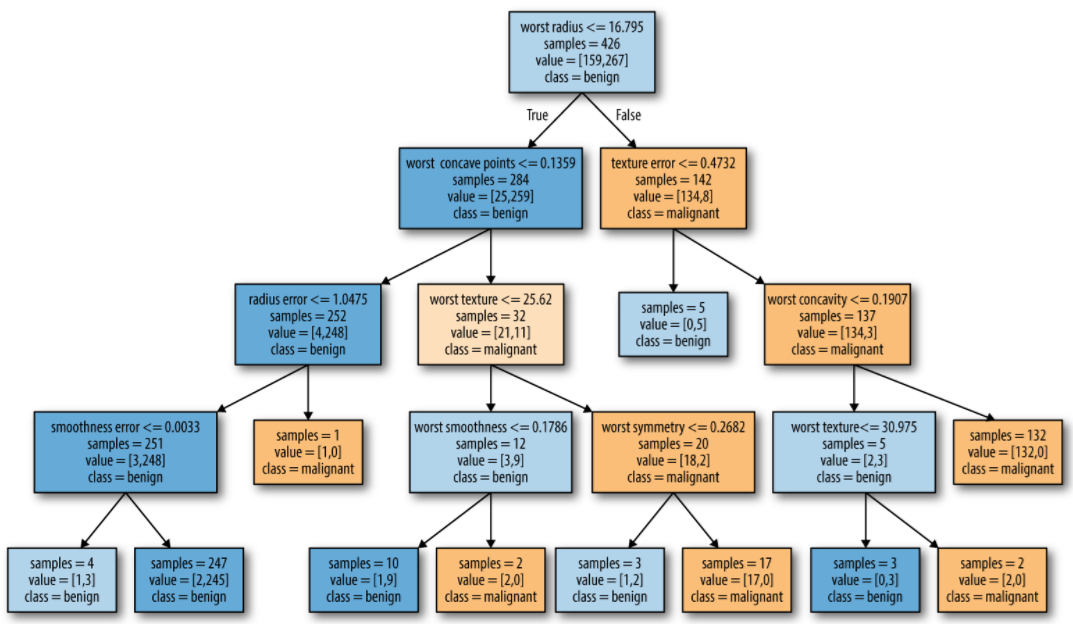

In [72]:
from IPython.display import Image
Image(filename='Fig2.png',width = "1000",height = "500")

**Do an analysis of the above visualization of the tree**

The visualization of the tree provides a great in-depth view of how the algorithm
makes predictions, and is a good example of a machine learning algorithm that is
easily explained to nonexperts. However, even with a tree of depth four, as seen here,
the tree can become a bit overwhelming. Deeper trees (a depth of 10 is not uncommon)
are even harder to grasp. One method of inspecting the tree that may be helpful
is to find out which path most of the data actually takes. The samples shown in each
node in the above figure gives the number of samples in that node, while value provides
the number of samples per class. Following the branches to the right, we see that
worst radius > 16.795 creates a node that contains only 8 benign but 134 malignant
samples. The rest of this side of the tree then uses some finer distinctions to split
off these 8 remaining benign samples. Of the 142 samples that went to the right in the
initial split, nearly all of them (132) end up in the leaf to the very right.


Taking a left at the root, for worst radius <= 16.795 we end up with 25 malignant
and 259 benign samples. Nearly all of the benign samples end up in the second leaf
from the left, with most of the other leaves containing very few samples.

# Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [73]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


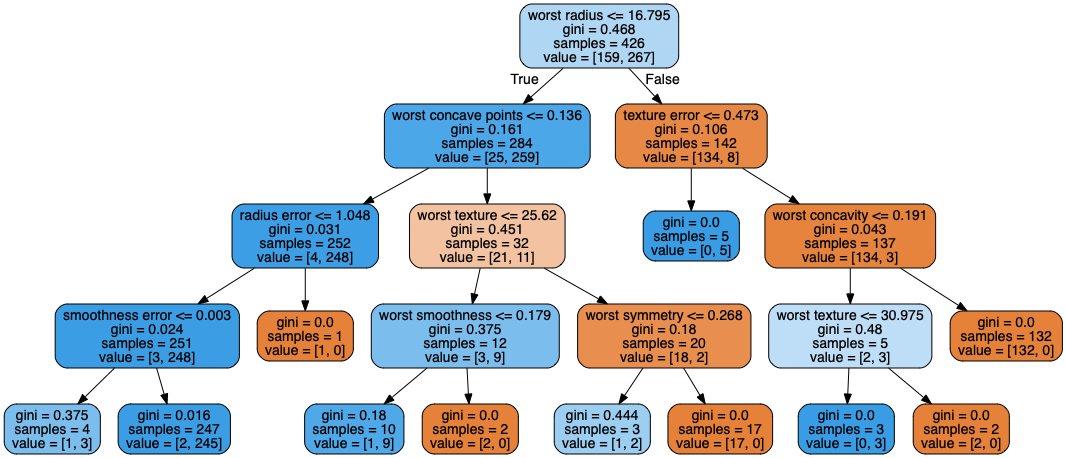

In [74]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,feature_names=cancer.feature_names,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

Now let's compare the decision tree model to a random forest.

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [82]:
rfc_pred = rfc.predict(X_test)

In [83]:
print("Accuracy of training data (with Random forests & max_depth 4):",rfc.score(X_train,y_train,sample_weight=None))
print("Accuracy of testing data (with Random forests & max_depth 4):",rfc.score(X_test,y_test,sample_weight=None))

Accuracy of training data (with Random forests & max_depth 4): 0.9929577464788732
Accuracy of testing data (with Random forests & max_depth 4): 0.958041958041958


In [84]:
print(confusion_matrix(y_test,rfc_pred))

[[49  4]
 [ 2 88]]


In [85]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



# Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful properties
that we can derive to summarize the workings of the tree. The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1:

In [86]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [87]:
print("Feature importances:\n{}".format(clf.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Decision trees for regression

### Create the dataset

In [88]:
import numpy as np
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [89]:
X.shape

(100, 1)

In [90]:
y.shape

(100,)

In [91]:
X

array([[0.        ],
       [0.06060606],
       [0.12121212],
       [0.18181818],
       [0.24242424],
       [0.3030303 ],
       [0.36363636],
       [0.42424242],
       [0.48484848],
       [0.54545455],
       [0.60606061],
       [0.66666667],
       [0.72727273],
       [0.78787879],
       [0.84848485],
       [0.90909091],
       [0.96969697],
       [1.03030303],
       [1.09090909],
       [1.15151515],
       [1.21212121],
       [1.27272727],
       [1.33333333],
       [1.39393939],
       [1.45454545],
       [1.51515152],
       [1.57575758],
       [1.63636364],
       [1.6969697 ],
       [1.75757576],
       [1.81818182],
       [1.87878788],
       [1.93939394],
       [2.        ],
       [2.06060606],
       [2.12121212],
       [2.18181818],
       [2.24242424],
       [2.3030303 ],
       [2.36363636],
       [2.42424242],
       [2.48484848],
       [2.54545455],
       [2.60606061],
       [2.66666667],
       [2.72727273],
       [2.78787879],
       [2.848

In [92]:
y

array([ 0.16243454,  0.35506848,  0.73293321,  0.96056821,  1.31984792,
        1.03781588,  1.34921854,  0.89696071,  0.72839089,  0.36311059,
        0.24101479, -0.34444676, -0.30720656, -0.329436  , -0.06555603,
       -0.05805642,  0.35904563,  0.6684755 ,  1.15054122,  1.55749478,
        1.66207538,  2.04679222,  2.05145522,  1.90756398,  1.72564365,
        1.25778015,  0.95793557,  0.52093983,  0.27848881,  0.13524791,
       -0.09587277, -0.04856934,  0.06249217,  0.28820394,  0.61394944,
        1.01124939,  1.20814475,  1.58217296,  1.85921717,  1.77503277,
        1.55600875,  1.23834863,  0.90835949,  0.7510826 ,  0.17445009,
       -0.27082498, -0.48627073, -0.48345353, -0.74216084, -0.62523488,
       -0.47813412, -0.28399902, -0.06467433,  0.30524975,  0.55645425,
        0.78103961,  0.83261336,  0.73850934,  0.44710333,  0.17908067,
       -0.37816431, -0.59149331, -1.05282155, -1.45029984, -1.58182951,
       -1.72061187, -1.54921792, -1.33851419, -1.00617712, -1.04

### **Q5**. Explain the features of the data

[Explanation...]

### **Q6**. Plot the data

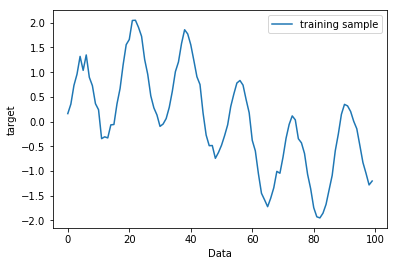

In [93]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(y,label="training sample")
plt.xlabel("Data")
plt.ylabel("target")
plt.legend()
plt.show()

### **Q7**. Training a regression tree with *max_depth=4*. Plot the figure to show how the model fits the data?

In [94]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=0,max_depth=4)
clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

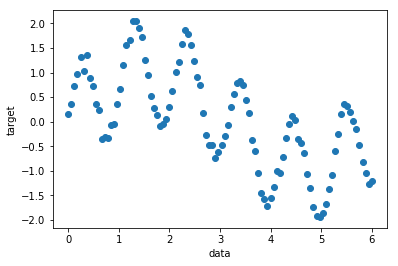

In [95]:
plt.scatter(X,y)
plt.xlabel("data")
plt.ylabel("target")
plt.show()

### **Q8**. Training two regression trees with *max_depth=4* and *max_depth=8*. Plot the figure to show how the models fit the data?

In [96]:
clf1 = tree.DecisionTreeRegressor(max_depth=4)
clf2 = tree.DecisionTreeRegressor(max_depth=8)
clf1.fit(X, y)
clf2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

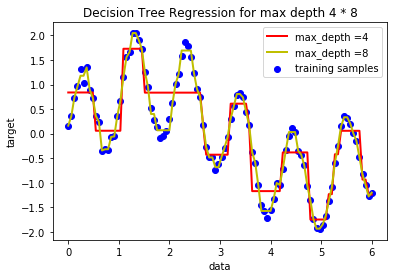

In [97]:
y_1 = clf1.predict(X)
y_2 = clf2.predict(X)

plt.figure()
plt.scatter(X, y, c="b", label="training samples")
plt.plot(X, y_1, c="r", label="max_depth =4", linewidth=2)
plt.plot(X, y_2, c="y", label="max_depth =8", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression for max depth 4 * 8")
plt.legend()
plt.show()